In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
# load data
file_path = '/content/drive/MyDrive/Blockchain/FINAL_MAJOR_project/agb/SOC_TRAINING_NEINDIA_10K_FINAL.csv'
df = pd.read_csv(file_path)

print(f"Dataset loaded. Shape: {df.shape}")

Dataset loaded. Shape: (10000, 17)


In [ ]:
#drop extra columns if any
cols_to_drop = [".geo", "system:index", "random"]
for c in cols_to_drop:
  if c in df.columns:
    df = df.drop(columns=[c])

In [ ]:
# define target
target_col = 'SOC_target'

In [ ]:
candidate_features = [
    'S2_B2', 'S2_B3', 'S2_B4', 'S2_B8', 'S2_B11', 'S2_NDVI',  # Optical
    'S1_VV', 'S1_VH',                                         # Radar
    'elevation', 'slope', 'aspect',                           # Terrain
    'precip_annual', 'temp_mean', 'soil_texture', 'latitude', 'longitude'                              # Categorical
]

In [ ]:
# Select only the features that actually exist in your CSV
features = [col for col in candidate_features if col in df.columns]
print(f"Training with {len(features)} features: {features}")

X = df[features]
y = df[target_col]

Training with 16 features: ['S2_B2', 'S2_B3', 'S2_B4', 'S2_B8', 'S2_B11', 'S2_NDVI', 'S1_VV', 'S1_VH', 'elevation', 'slope', 'aspect', 'precip_annual', 'temp_mean', 'soil_texture', 'latitude', 'longitude']


In [ ]:
# split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [ ]:
# train model
print("Training Random Forest Model...")
rf_model = RandomForestRegressor(
    n_estimators=100,  # Number of trees
    random_state=42,   # Ensures reproducibility
    n_jobs=-1          # Uses all CPU cores
)

rf_model.fit(X_train, y_train)
print("Training complete.")

Training Random Forest Model...
Training complete.


In [ ]:
# evaluate
y_pred = rf_model.predict(X_test)

In [ ]:
# Calculate metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("-" * 30)
print("MODEL PERFORMANCE (Test Set)")
print("-" * 30)
print(f"R² Score: {r2:.4f}")
print(f"RMSE:     {rmse:.4f}")
print(f"MAE:      {mae:.4f}")
print("-" * 30)

------------------------------
MODEL PERFORMANCE (Test Set)
------------------------------
R² Score: 0.6422
RMSE:     0.9878
MAE:      0.6521
------------------------------


/tmp/ipython-input-580570395.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=[features[i] for i in indices], palette='viridis')


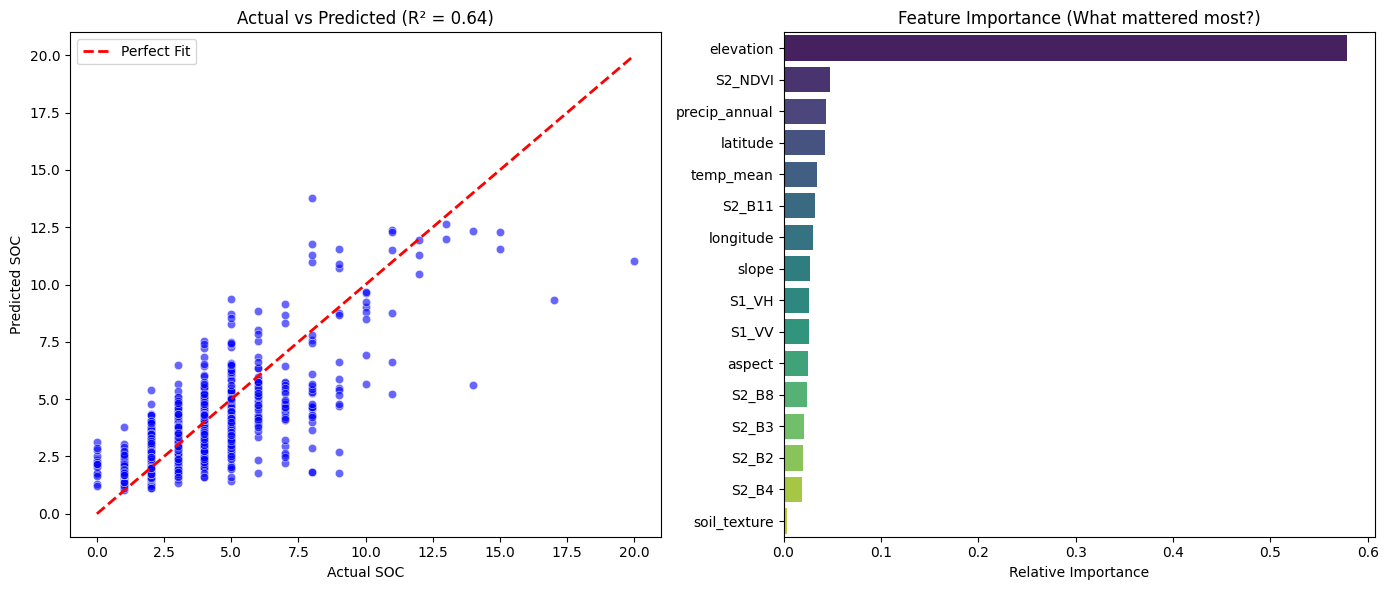

In [ ]:
# 6. VISUALIZE RESULTS
# ==========================================
plt.figure(figsize=(14, 6))

# Plot 1: Actual vs Predicted
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='blue')
# Add a 1:1 perfect prediction line
m, M = min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())
plt.plot([m, M], [m, M], 'r--', linewidth=2, label='Perfect Fit')
plt.xlabel('Actual SOC')
plt.ylabel('Predicted SOC')
plt.title(f'Actual vs Predicted (R² = {r2:.2f})')
plt.legend()

# Plot 2: Feature Importance
plt.subplot(1, 2, 2)
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1] # Sort descending
sns.barplot(x=importances[indices], y=[features[i] for i in indices], palette='viridis')
plt.title('Feature Importance (What mattered most?)')
plt.xlabel('Relative Importance')

plt.tight_layout()
plt.show()

In [ ]:
import joblib

joblib.dump(rf_model, "/content/drive/MyDrive/Blockchain/FINAL_MAJOR_project/soc/S1_S2_RF/SOC_model.pkl")
print("Model saved as SOC_RF_model.pkl")

Model saved as SOC_RF_model.pkl
